In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

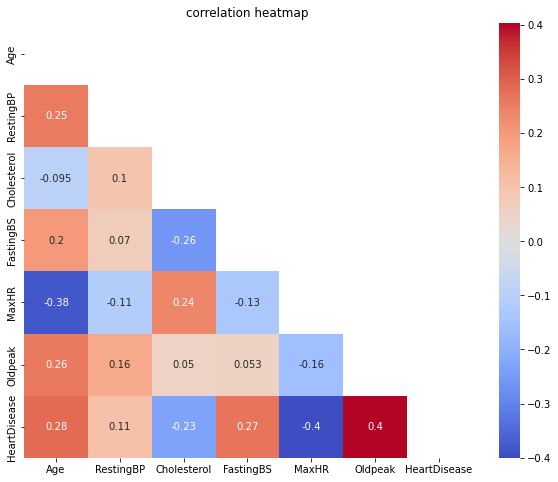

In [8]:
correlations = df.corr()
mask = np.triu(correlations)
plt.figure(figsize=(10,8))
sns.heatmap(correlations,annot=True,cmap='coolwarm', center=0,mask=mask)
plt.title('correlation heatmap')
plt.show()

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

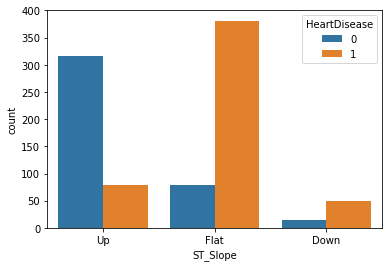

In [14]:
sns.countplot(x="ST_Slope", hue="HeartDisease", data=df)

## insights into the dataset

- ### What is RestingBP?
    BP taken when the patient is at rest

- ### ChestPainTypes:
    - Typical angina: chest pain related decrease blood supply to the heart
    - Atypical angina: chest pain not related to heart
    - Non-anginal pain: typically esophageal spasms (non heart related)
    - Asymptomatic: chest pain not showing signs of disease

- ### FastingBS:
    - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - '>124' mg/dL signals diabetes (prediabetes)

- ### RestingECG:
    - 0: normal
    - 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 

- ### ExerciseAngina:
    - Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.
    - 1 = yes, 0 = no
- ### OldPeak: ST [Numeric value measured in depression]
    - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
     ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

- ### ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    - The ST segment is the flat, isoelectric section of the ECG between the end of the S wave (the J point) and the beginning of the T wave. The ST segment represents the interval between ventricular depolarization and repolarization. The most important cause of ST segment abnormality (elevation or depression) is myocardial ischaemia or infarction.




----
**additional info:**

- #### What is Angina?
    - Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. It may feel like pressure or squeezing in your chest. The discomfort also can occur in your shoulders, arms, neck, jaw, or back. Angina pain may even feel like indigestion.



- #### Why does ST region determine heart anomalies?
    - The ST segment is the flat, isoelectric section of the ECG between the end of the S wave (the J point) and the beginning of the T wave. The ST segment represents the interval between ventricular depolarization and repolarization. The most important cause of ST segment abnormality (elevation or depression) is myocardial ischaemia or infarction.

![ecgdiag](./ecgdiag.png)

- #### What is estes' criteria:
    - Estes' criteria for left ventricular hypertrophy (LVH) is a point score system used to assess the likelihood of left ventricular hypertrophy based on the findings of an electrocardiogram (ECG).

- #### what is LVH?
    - Left ventricular hypertrophy (LVH) is thickening of the heart muscle of the left ventricle of the heart, that is, left-sided ventricular hypertrophy. While ventricular hypertrophy occurs naturally as a reaction to aerobic exercise and strength training, it is most frequently referred to as a pathological reaction to cardiovascular disease, or high blood pressure.

- ##### What does the LV do?
    - The left ventricle receives oxygenated blood from the left atrium via the mitral valve and pumps it through the aorta via the aortic valve, into the systemic circulation.

- ##### What happens upon LVH?
    - The thickening makes the chamber smaller in volume, so that it holds less blood. The thickening also slows the passage of blood through the mitral valve, which means that more blood remains in the left ventricle during diastole. This causes an increase in diastolic pressure and volume so that the pressure in the left atrium increases. To maintain the same cardiac output, the heart rate will need to increase in compensation. Over time, the diastolic dysfunction can progress to systolic dysfunction, which means the left ventricle's ability to contract is also compromised.